In [7]:
import pyes
import json


host = '140.118.155.14:9200'

#watch FB posts

def facebook():
    conn = pyes.es.ES(host)
    tq = pyes.query.MatchAllQuery()
    tagg = pyes.aggs.TermsAgg('fid', field= 'fid', sub_aggs=[])
    tagg_name = pyes.aggs.TermsAgg('fname', field= 'fname')
    tagg.sub_aggs.append(tagg_name)

    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(tagg)
    
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='post')
    #print json.dumps(result.aggs,indent=2)
    #print json.dumps(result[0],indent=2)
    #print json.dumps(result.aggs["fid"]["buckets"],indent=2)
    
    for fidpid_summary in result.aggs["fid"]["buckets"]:
        print fidpid_summary['fname']['buckets'][0]['key']+ ',' +str(fidpid_summary["key"]) + ',' + str(fidpid_summary["doc_count"])
facebook()



遠傳電信,162583067088337,4793
Samsung Mobile Taiwan,100489613340306,4238
屈臣氏 Watsons Taiwan,131307770301236,4006
統一時代百貨台北店,185375828171317,3669
CDC,76625396025,3637
PChome 24h購物,203507002993446,3597
中國信託優惠情報“讚”,210121695693833,2912
全家FamilyMart,152341009257,2863
Yahoo奇摩,230899156962824,2499
SOGO 百貨,130264340329811,2478
SYM－SanYang Motor,131580750222123,2390
家樂福 Carrefour Taiwan,170290829685289,2312
ASUS Taiwan,177612180793,2248
大潤發 RT-mart,156435698616,2175
黑貓宅急便/黑貓先生,131046917110,2081
Sony Mobile TW,304834096975,1822
Ford Taiwan,157941490891336,1795
中華電信行動學園,166459533383697,1689
China Airlines 中華航空,119474188105563,1678
防疫先鋒,222708744426746,1651
國泰人壽,186034394769383,1642
康是美,188974237800490,1524
1922防疫達人,154929428406,1520
BlackBerry,13004060847,1500
全聯福利中心,134004310003557,1497
Microsoft Taiwan,395317217235059,1416
Uniqlo Taiwan,140574649321224,1390
Nissan,124203007630468,1352
MOS Burger 摩斯漢堡「癮迷」俱樂部,259676855661,1315
味全 MyWei,127621073969166,1302
LG 台灣,177994952213680,1274
苗栗長照溫馨情,329671837

In [26]:
#samsung
samsung = '100489613340306'
#sony
sony = '304834096975'
#htc
htc = '101063233083'


def fb_comment(fb_name,fid):
    print fb_name+":"
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(tagg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
    #print json.dumps(result.aggs,indent=2) 
    print "Faecbook_Posts:" + "\t\t\t\tComment"
    for fidpid_summary in result.aggs["pid"]["buckets"]:
        print fidpid_summary['key'] + '\t\t' + str(fidpid_summary["doc_count"])
    print "\n\n"

fb_comment("Samsung",samsung)

Samsung:
Faecbook_Posts:				Comment
100489613340306_718603768195551		7483
100489613340306_749068545149073		5801
100489613340306_708816102507651		5397
100489613340306_716046481784613		4272
100489613340306_783339018388692		3735
100489613340306_744844305571497		3713
100489613340306_903737003015559		3706
100489613340306_774893362566591		3644
100489613340306_691118537610741		3592
100489613340306_746205598768701		3562
100489613340306_664848483571080		3392
100489613340306_753283324727595		3378
100489613340306_949451188444140		3069
100489613340306_774925559230038		2905
100489613340306_928247197231206		2889
100489613340306_739633279425933		2846
100489613340306_743046125751315		2845
100489613340306_709239959131932		2748
100489613340306_477771638945433		2715
100489613340306_733515530037708		2502
100489613340306_829302577125669		2340
100489613340306_745367912185803		2321
100489613340306_719791338076794		2242
100489613340306_573122226077040		2185
100489613340306_743427835713144		2108
10048961334030

In [27]:
fb_comment("Sony",sony)

Sony:
Faecbook_Posts:				Comment
304834096975_10152982222261976		13035
304834096975_10153102656966976		5751
304834096975_10153457887901976		5007
304834096975_10152504369051976		4817
304834096975_10153104240266976		4574
304834096975_10153260549706976		3566
304834096975_10153247290421976		3314
304834096975_10151289237991976		3177
304834096975_10152907462086976		3144
304834096975_10153108622131976		3131
304834096975_10153444726131976		3061
304834096975_10152864671646976		2990
304834096975_10153113023921976		2743
304834096975_10153250683121976		2543
304834096975_10152966914336976		2431
304834096975_10152334546411976		2423
304834096975_10153262382431976		2264
304834096975_10153098723021976		2044
304834096975_10153196697801976		2031
304834096975_10153309868056976		1895
304834096975_10151894574421976		1727
304834096975_10152770000866976		1694
304834096975_10152102067366976		1537
304834096975_10152770315666976		1480
304834096975_10151555796956976		1415
304834096975_10151470803226976		1364
3048

In [28]:
fb_comment("HTC",htc)

HTC:
Faecbook_Posts:				Comment
101063233083_10152181419338084		3680
101063233083_10153684603248084		2028
101063233083_10154819318688084		1961
101063233083_10152072822998084		1888
101063233083_10152000356778084		1731
101063233083_10151730256373084		1704
101063233083_10152584406793084		1472
101063233083_10151743350218084		1424
101063233083_10154770075418084		1340
101063233083_10152291304273084		1223
101063233083_10154587923248084		1215
101063233083_10151768160963084		1116
101063233083_10153177722388084		1099
101063233083_10152206404343084		1091
101063233083_10151787125088084		1079
101063233083_10153774278803084		984
101063233083_10152715489553084		974
101063233083_10152184229048084		922
101063233083_10153331761113084		922
101063233083_10151836434893084		886
101063233083_10154853321563084		859
101063233083_10151749974608084		830
101063233083_10152115461213084		822
101063233083_10151752514043084		821
101063233083_10152242328783084		818
101063233083_10152089294798084		770
101063233083_1015

In [78]:
%matplotlib inline
import numpy
import pandas
from bokeh import charts, plotting, models
from bokeh.charts import Donut
from bokeh.sampledata.autompg import autompg as df

plotting.output_notebook()

def graph(fb_name,x,y):
    x = range(1,len(x))
    plot = figure(title=fb_name+' Line', x_axis_label='x', y_axis_label='y')
    plot.line(x, y, legend=fb_name, line_width=4)
    plotting.show(plot)

def date_comment(fb_name,fid):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    #tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg = pyes.aggs.DateHistogramAgg('month' ,field='created_time', interval='month',sub_aggs=[])
    tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg.sub_aggs.append(tagg) 
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(DHAgg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
    #print json.dumps(result.aggs,indent=2)
    x = []
    y = []
    for month in result.aggs["month"]["buckets"]:
        x.append(str(month["key_as_string"][2:7]))
        y.append(str(month["doc_count"]))
    graph(fb_name+" Comment",x,y)

date_comment("Samsung",samsung)

Loading BokehJS ...

In [67]:
date_comment("Sony",sony)

In [68]:
date_comment("HTC",htc)

In [88]:
%matplotlib inline

import pyes
import json
import pandas as pd
import seaborn as sns

def pp(o): 
    print json.dumps(o, indent=1)

def boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter):
    data=[]
    for fid in fids:
        conn = pyes.es.ES(host)
        tq = pyes.query.TermQuery(field="fid", value=fid)
        tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
        qsearch = pyes.query.Search(tq) 
        qsearch.agg.add(tagg) 
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
        #print json.dumps(result.aggs,indent=2) 
        for fidpid_summary in result.aggs["pid"]["buckets"]:
            #print fidpid_summary["key"] + ',' + str(fidpid_summary["doc_count"])
            if fidpid_summary["doc_count"] < outlierFilter or outlierFilter < 0:
                data.append([fidpid_summary["doc_count"],fid,fidpid_summary["key"]])

    df=pd.DataFrame(data,columns={'count','fid','fidpid'})
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="fid", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    fig.savefig(pngFilePath)

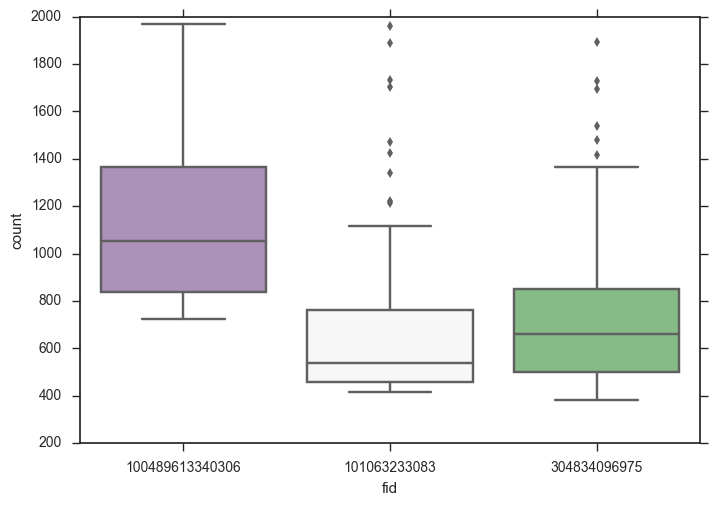

In [89]:
#assign the facebook fans page that you prefered
fids=[samsung,sony,htc]

#elasticsearch repository provided by this course

#output box plot PNG figure
pngFilePath="output.png"

#outlier threshold you want to filter (if you give minus ONE, none of outlier is filtered.)
outlierFilter=2000

#obtain the result and save as "pngFilePath" given from you
boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter)

In [90]:
import pyes
import json
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


def boxPlotNumofPostPerMonth(fid,host,lowerbound,upperbound,pngFilePath):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    #tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg = pyes.aggs.DateHistogramAgg('month' ,field='created_time', interval='month',sub_aggs=[])
    tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg.sub_aggs.append(tagg) 
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(DHAgg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')

    data=[]
    for r in result.aggs["month"]["buckets"]:
        for pid in r["pid"]["buckets"]:
            monthyear=datetime.datetime.strptime(r["key_as_string"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime('%Y/%m')
            data.append([pid["doc_count"],monthyear,pid["key"],r["key"]])

    df=pd.DataFrame(data,columns={'date','count','fid','pid'})
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="date", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    plt.ylim(lower_bound, upper_bound)
    fig.savefig(pngFilePath)

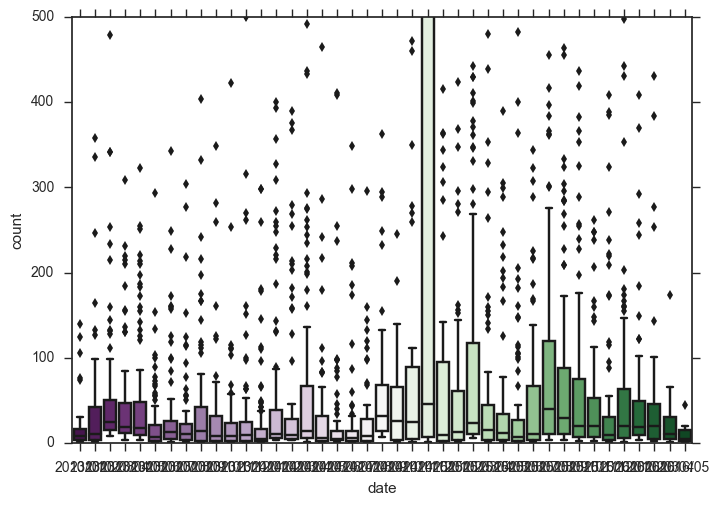

In [95]:
lower_bound = 0
upper_bound = 500
pngFilePath="output3.png"
boxPlotNumofPostPerMonth(samsung,host,lower_bound,upper_bound,pngFilePath)

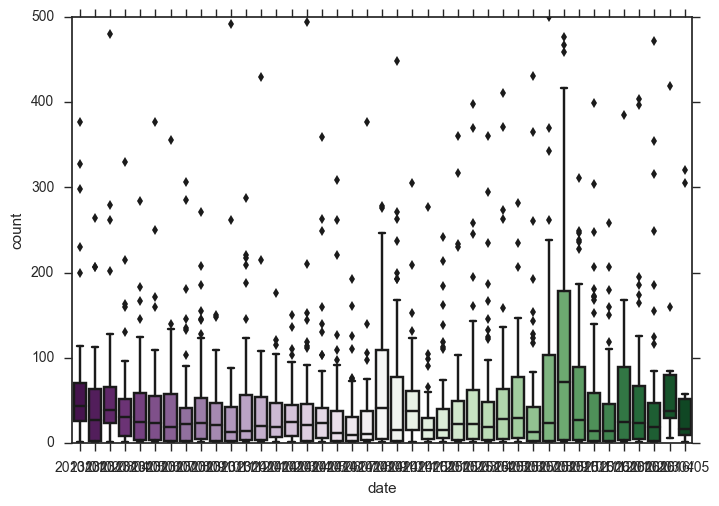

In [97]:
boxPlotNumofPostPerMonth(sony,host,lower_bound,upper_bound,pngFilePath)

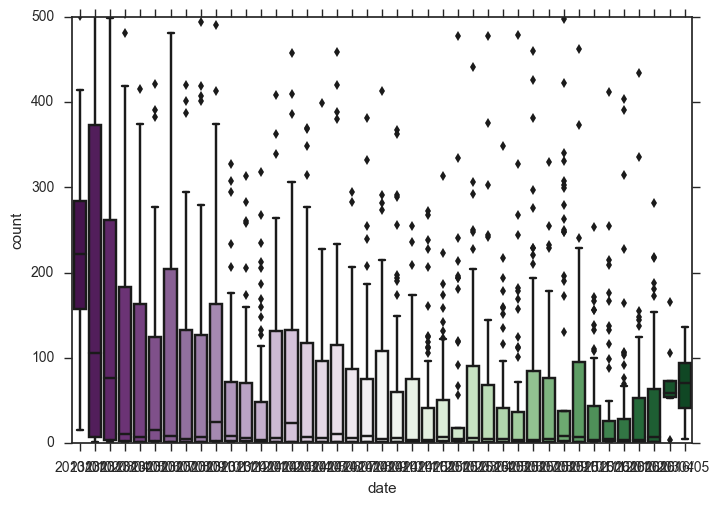

In [96]:
boxPlotNumofPostPerMonth(htc,host,lower_bound,upper_bound,pngFilePath)